## Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load training and testing datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head(10)

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
5,Tune in to Nigezie and be treated to Rachel Pl...,figurative
6,What iz thiz?!?!? A friggin DC love fest??!?!?...,figurative
7,"man, i wish i could sexually harass an intoxic...",figurative
8,@raaachf for the car ride when I get to listen...,figurative
9,Aamir calls #BajrangiBhaijaan as Salman's best...,figurative


In [5]:
test_data.head(10)

,tweets,class
0,no one ever predicted this was going to happen...,figurative
1,@Stooshie its as closely related as Andrews or...,figurative
2,I find it ironic when Vegans say they love foo...,figurative
3,Quick rt that throwing money vine I've not see...,figurative
4,"yep, keep adding me to your #devops lists.... ...",figurative
5,wonderful time with customer service @TMobile ...,figurative
6,@RalphtheBold: But ... football. #sarcasm,figurative
7,So last month I lost my job and today my dad l...,figurative
8,"Rahm has solved crime, budget &amp; pension is...",figurative
9,And the heel on my @katespadeny shoe just brok...,figurative


In [6]:
train_data.groupby('class').count()

,tweets
class,
figurative,21238
irony,20894
regular,18595
sarcasm,20681


In [7]:
test_data.groupby('class').count()

,tweets
class,
figurative,2044
irony,2111
regular,1859
sarcasm,2105


## Data Cleaning

In [8]:
# removing unnecessary characters from training data
train_data['tweets'] = train_data['tweets'].str.replace(r"http\S+", "")
train_data['tweets'] = train_data['tweets'].str.replace(r"http", "")
train_data['tweets'] = train_data['tweets'].str.replace(r"@\S+", "")
train_data['tweets'] = train_data['tweets'].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
train_data['tweets'] = train_data['tweets'].str.replace(r"@", "at")
train_data['tweets'] = train_data['tweets'].str.lower()

In [9]:
train_data

,tweets,class
0,be aware dirty step to get money staylight ...,figurative
1,sarcasm for people who don't understand diy...,figurative
2,dailymail readers being sensible as always ...,figurative
3,why do i get the feeling you like games? sar...,figurative
4,you probably just missed the text sarcastic,figurative
...,...,...
81403,photo image via we heart it childhood cool...,sarcasm
81404,i never knew i better put this out to the uni...,sarcasm
81405,hey just wanted to say thanks at puberty for l...,sarcasm
81406,i'm sure coverage like the fox news special t...,sarcasm


In [10]:
# removing unnecessary characters from testing data
test_data['tweets'] = test_data['tweets'].str.replace(r"http\S+", "")
test_data['tweets'] = test_data['tweets'].str.replace(r"http", "")
test_data['tweets'] = test_data['tweets'].str.replace(r"@\S+", "")
test_data['tweets'] = test_data['tweets'].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
test_data['tweets'] = test_data['tweets'].str.replace(r"@", "at")
test_data['tweets'] = test_data['tweets'].str.lower()

In [11]:
test_data

,tweets,class
0,no one ever predicted this was going to happen...,figurative
1,its as closely related as andrews original cl...,figurative
2,i find it ironic when vegans say they love foo...,figurative
3,quick rt that throwing money vine i've not see...,figurative
4,"yep, keep adding me to your devops lists ...",figurative
...,...,...
8123,why yes i will totally submit my photos to a s...,sarcasm
8124,test on a saturday! thank you uni! sarcasm at...,sarcasm
8125,listening to misery isn't at all disconcertin...,sarcasm
8126,there you go being kind again sarcasm stand...,sarcasm


In [12]:
train_data.isna().sum()

tweets    0
class     0
dtype: int64

In [13]:
test_data.isna().sum()

tweets    2
class     9
dtype: int64

In [14]:
# dropping rows with null values
test_data.dropna(axis=0, inplace=True)

In [15]:
test_data.isnull().sum()

tweets    0
class     0
dtype: int64

## Data Visualization

<AxesSubplot:ylabel='class'>

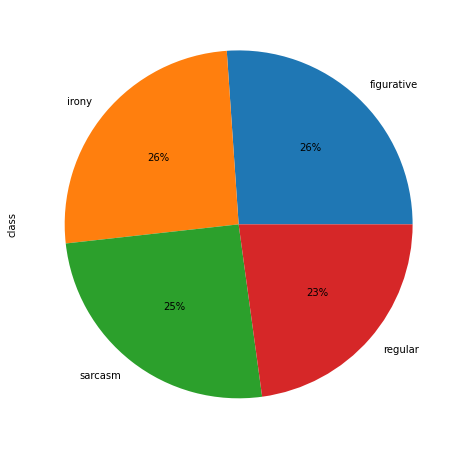

In [16]:
# pie chart showing distribution of classes
plt.figure(figsize = (8,8))
train_data['class'].value_counts().plot(kind='pie', autopct='%1.0f%%')

## Data Preprocessing

In [17]:
# changing the class names to target integer values
def encode(label):
    label = str(label)
    target = {'irony': 0, 'sarcasm': 1, 'regular': 2, 'figurative': 3}
    return target[label]

In [18]:
train_data['class'] = train_data['class'].apply(lambda x: encode(x))
test_data['class'] = test_data['class'].apply(lambda x: encode(x))

In [19]:
train_data.head()

,tweets,class
0,be aware dirty step to get money staylight ...,3
1,sarcasm for people who don't understand diy...,3
2,dailymail readers being sensible as always ...,3
3,why do i get the feeling you like games? sar...,3
4,you probably just missed the text sarcastic,3


In [20]:
test_data.head()

,tweets,class
0,no one ever predicted this was going to happen...,3
1,its as closely related as andrews original cl...,3
2,i find it ironic when vegans say they love foo...,3
3,quick rt that throwing money vine i've not see...,3
4,"yep, keep adding me to your devops lists ...",3


In [21]:
# importing the nlp library
import nltk
from nltk.corpus import stopwords

In [22]:
# transform the text using a text vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
  
tfidf = TfidfVectorizer(max_features=55000, analyzer='word', token_pattern=r'\w{1,}', stop_words=stopwords.words('english'))
tfidf.fit(train_data['tweets'])
tfidf.fit(test_data['tweets'])

TfidfVectorizer(max_features=55000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                token_pattern='\\w{1,}')

In [23]:
# training and testing input variables
xtrain = tfidf.transform(train_data['tweets'])
xtest = tfidf.transform(test_data['tweets'])

In [24]:
# training and testing output variables
ytrain = train_data['class']
ytest = test_data['class']

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## XGB Model

In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [27]:
ypred = xgb.predict(xtest)

In [28]:
accuracy_score(ytest, ypred)

0.7407316171942357

#### The XGBoost Classifier gives an accuracy of 74.07%.

In [29]:
print(confusion_matrix(ytest, ypred))

[[2066    0    0   45]
 [   0 2072    0   33]
 [   0    1 1858    0]
 [1029  997    0   18]]


In [30]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.67      0.98      0.79      2111
           1       0.67      0.98      0.80      2105
           2       1.00      1.00      1.00      1859
           3       0.19      0.01      0.02      2044

    accuracy                           0.74      8119
   macro avg       0.63      0.74      0.65      8119
weighted avg       0.62      0.74      0.65      8119



## SVM Model

In [31]:
from sklearn.svm import SVC 

svm = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')  
svm.fit(xtrain, ytrain)  

SVC(gamma='auto', kernel='linear')

In [32]:
pred = svm.predict(xtest)

In [33]:
accuracy_score(ytest, pred)

0.7440571498953074

#### The SVM Classifier gives an accuracy of 74.40%.

In [34]:
print(confusion_matrix(ytest, pred))

[[2097    0    0   14]
 [   0 2068    0   37]
 [   0    1 1858    0]
 [1028  998    0   18]]


In [35]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80      2111
           1       0.67      0.98      0.80      2105
           2       1.00      1.00      1.00      1859
           3       0.26      0.01      0.02      2044

    accuracy                           0.74      8119
   macro avg       0.65      0.75      0.65      8119
weighted avg       0.64      0.74      0.65      8119



### The 'regular' class i.e. class 2 has the highest precision. 

### We see that the 'figurative' class of tweets i.e. class 3 has very low precision. It is because it is a combination of class 0 - 'irony' and class 1 - 'sarcasm'. Hence most of the 'figurative' tweets get classified into 'irony' or 'sarcasm'. Due to this, the precision of class 0 and class 1 is somewhat low as compared to class 2.

## An accuracy of 74% gives us a good model for the classification of tweets.